### MALE FEMALE BIASES CALCULATION


In [1]:
### import necessariy modules


In [2]:
import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from word_sets_male_female import MALE_WORDS_BANGLA, FEMALE_WORDS_BANGLA, PROFESSIONAL_OCCUPATIONS_BANGLA, PROFESSIONAL_OCCUPATIONS_ENGLISH
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

### load male, female & professional occupation wordlist

In [3]:
target_groups = [PROFESSIONAL_OCCUPATIONS_BANGLA]
target_group_labels = ['professional_occupation']

reference_groups = [MALE_WORDS_BANGLA, FEMALE_WORDS_BANGLA]
reference_group_labels = ['male', 'female']

print('target group -->')
for group, labels in zip(target_groups, target_group_labels):
    print(labels, group)

print('reference group -->')
for group, labels in zip(reference_groups, reference_group_labels):
    print(labels, group)



b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS_BANGLA, PROFESSIONAL_OCCUPATIONS_ENGLISH)


target group -->
professional_occupation ['পরিসংখ্যানবিদ', 'ফটোগ্রাফার', 'অ্যাথলেট', 'নৃত্যশিল্পী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'তাঁতী', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'শ্রমিক', 'দালাল', 'গ্রন্থাগারিক', 'সংগীতজ্ঞ', 'পোর্টার', 'বিজ্ঞানী', 'স্থপতি', 'অপারেটর', 'সার্জন', 'ড্রাইভার', 'কন্ডাক্টর', 'নার্স', 'কুক', 'প্রকৌশলী', 'আইনজীবী', 'কৃষক', 'কেরানি', 'ব্যবস্থাপক', 'শিল্পী', 'পুলিশ', 'ডাক্তার', 'অধ্যাপক', 'বিচারক', 'শিক্ষক', 'লেখক', 'সচিব', 'সৈনিক', 'সাংসদ']
reference group -->
male ['ছেলে', 'পুত্র', 'পিতা', 'বাবা', 'আব্বা', 'পুরুষ', 'ছেলেরা', 'দাদা', 'ভাই', 'চাচা', 'মামা', 'ভাগ্নে']
female ['কন্যা', 'মেয়ে', 'মা', 'আম্মা', 'মহিলা', 'মেয়েরা', 'দিদি', 'বোন', 'চাচী', 'খালা', 'ভাগ্নি']


In [4]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

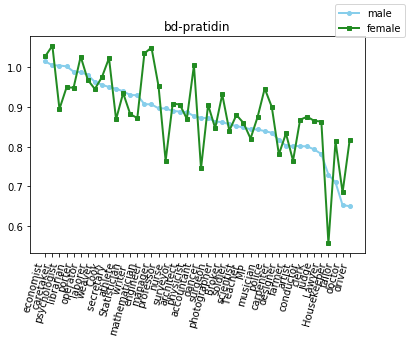

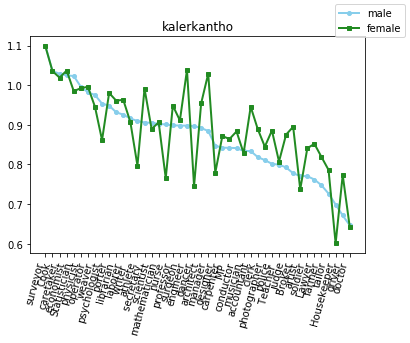

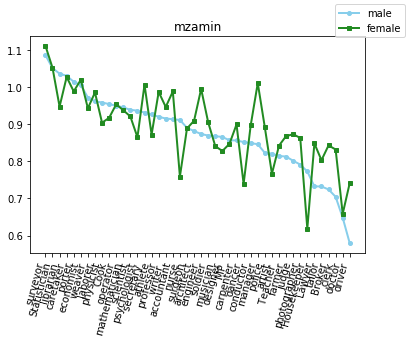

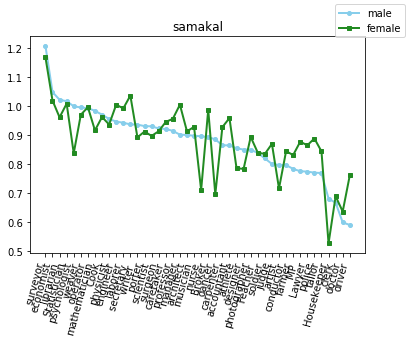

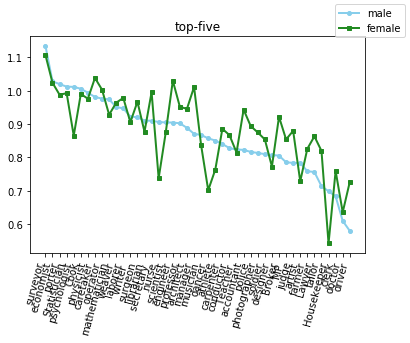

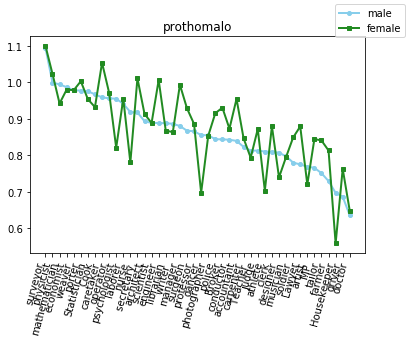

word সমীক্ষক not in embedding 
word সমীক্ষক not in embedding 


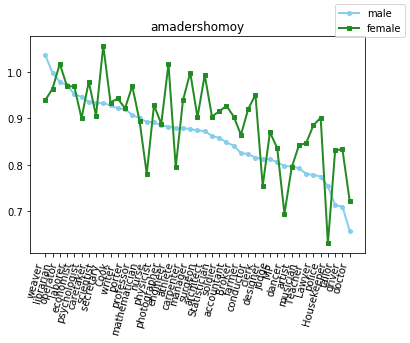

word গণিতবিদ not in embedding 
word গ্রন্থাগারিক not in embedding 
word গণিতবিদ not in embedding 
word গ্রন্থাগারিক not in embedding 


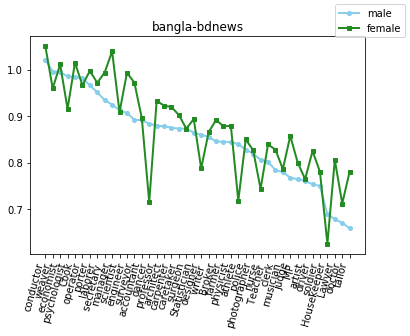

word সমীক্ষক not in embedding 
word সমীক্ষক not in embedding 


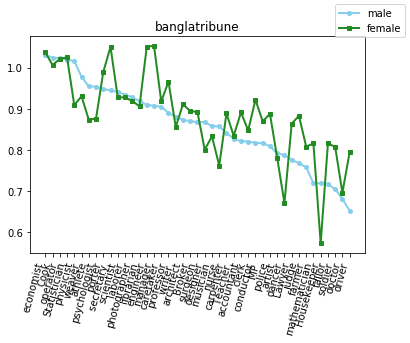

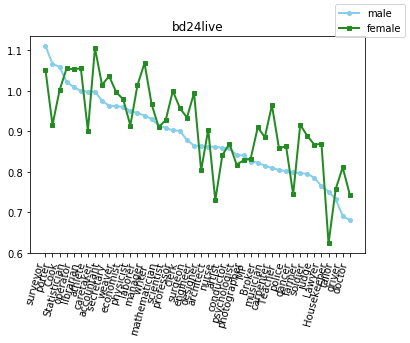

word সমীক্ষক not in embedding 
word সমীক্ষক not in embedding 


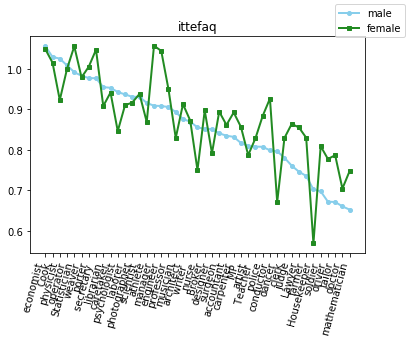

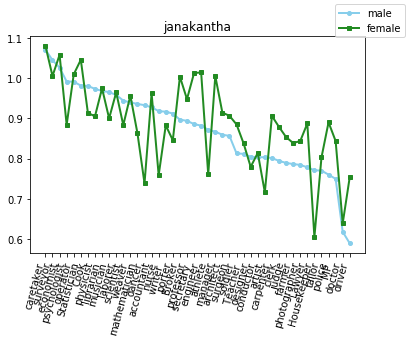

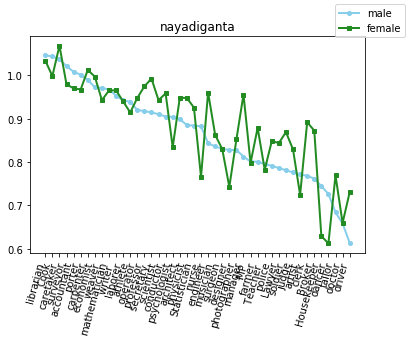

word গণিতবিদ not in embedding 
word সমীক্ষক not in embedding 
word পোর্টার not in embedding 
word কেরানি not in embedding 
word চাচী not in embedding 
word গণিতবিদ not in embedding 
word সমীক্ষক not in embedding 
word পোর্টার not in embedding 
word কেরানি not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'চাচী' not in vocabulary"


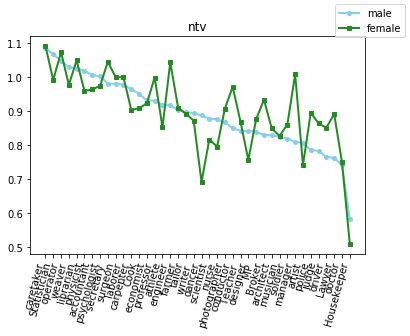

In [5]:
association_dict = {}
model_dir = '../newspaper_embedding/models/newspaper-wise/txt/'
filenames = glob.glob(model_dir + '*txt')
# print(filenames)
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)

# print(association_dict)

### Calculate male bias for all embedding

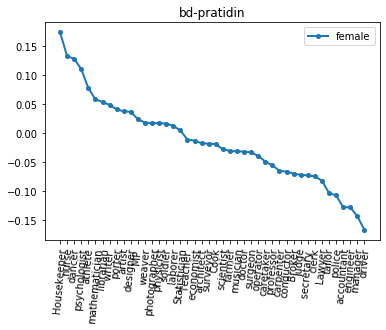

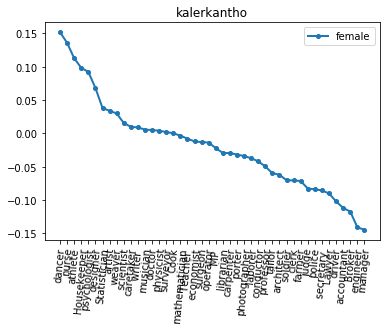

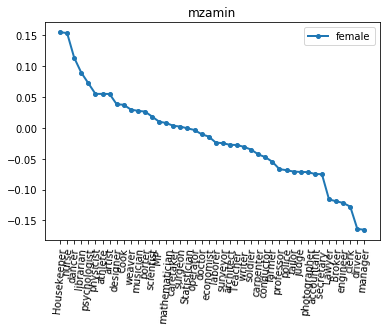

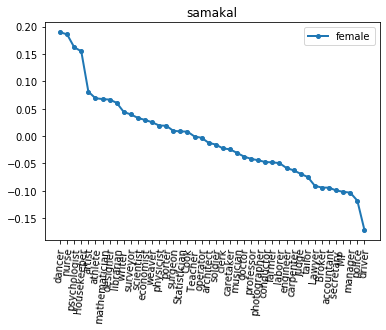

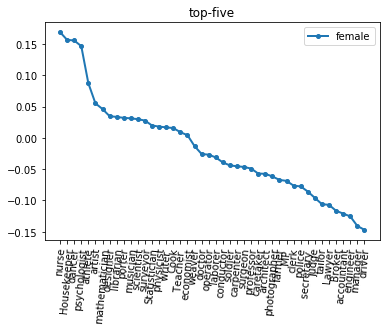

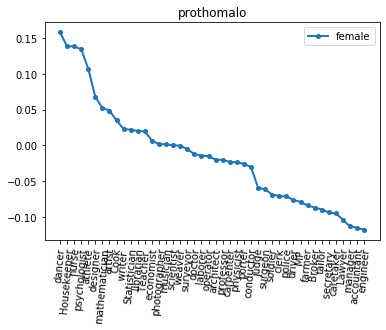

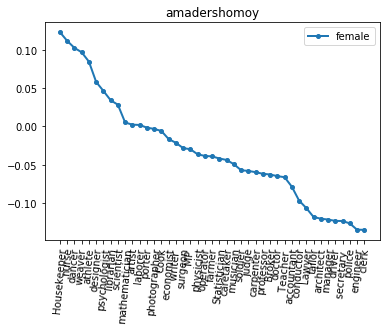

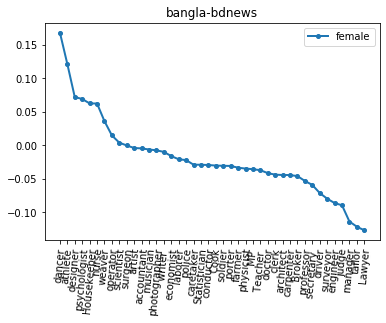

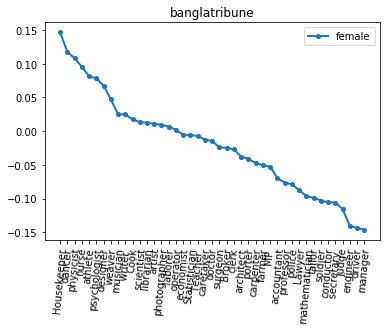

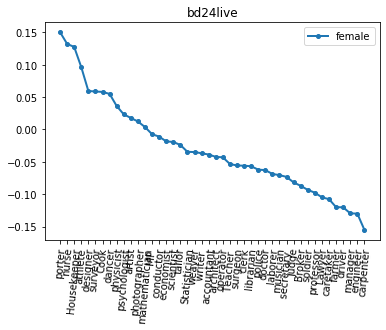

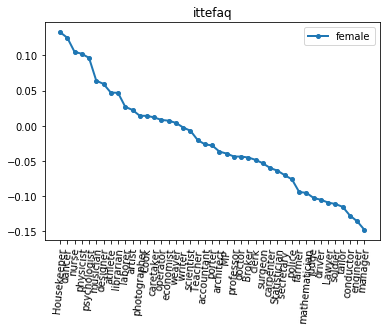

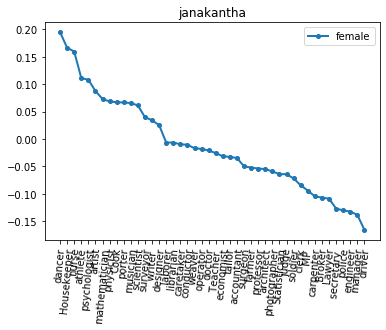

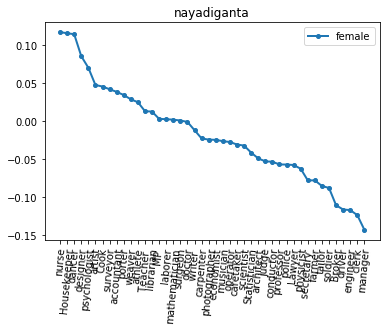

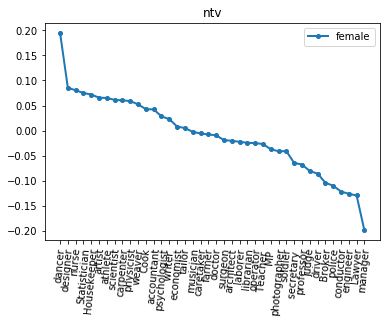

In [6]:
from plot_utils import get_bias_plot
male_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = target_group_labels[0], 
                                                                     reference_labels = reference_group_labels)

get_bias_plot(bias_dict=male_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = reference_group_labels[1])

In [7]:

import pandas as pd
df = pd.DataFrame.from_dict(male_bias_dict_for_all_embeddings)

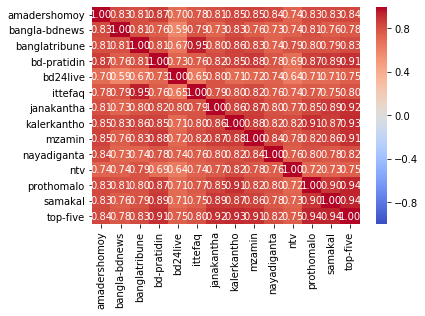

In [8]:
get_correlation_heatmap(df=df)

